In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\hp\Downloads\retail_sales_dataset.csv")

In [5]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [13]:
data.shape

(1000, 9)

In [15]:
data.size

9000

# Dataset Overview 

Total Records: 1000

Total Columns: 9

Data Types:

Numerical: Age, Quantity, Price per Unit, Total Amount

Categorical: Gender, Product Category, Customer ID

No missing values present in the dataset

This shows dataset is clean & analysis-ready.

# Data Preparation

### Convert Date column to datetime

In [21]:
data["Date"] = pd.to_datetime(data["Date"])

### Create Month column

In [26]:
data["Month"] = data["Date"].dt.month

# EDA Questions

### 1. Total Sales

In [37]:
data["Total Amount"].sum()

456000

### 2. Sales by product category

In [57]:
data.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

### 3. Gender-wise sales

In [53]:
data.groupby("Gender")["Total Amount"].sum()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

### 4. Age-wise spending pattern

In [73]:
data.groupby("Age")["Total Amount"].mean().sort_values(ascending = False)

Age
37    728.125000
19    708.095238
26    635.454545
21    629.250000
33    624.000000
36    607.000000
34    599.464286
38    584.210526
43    579.677419
53    559.411765
59    557.058824
63    544.117647
51    535.500000
18    534.047619
58    528.214286
60    526.818182
46    523.600000
35    513.181818
22    507.407407
44    504.000000
56    496.842105
25    495.000000
47    480.961538
55    465.714286
31    464.545455
30    445.000000
50    428.043478
28    412.857143
20    411.666667
29    410.625000
27    408.043478
48    402.222222
40    392.291667
54    375.178571
61    373.888889
45    372.058824
24    361.000000
23    342.500000
42    326.923077
52    320.000000
57    309.666667
62    300.740741
64    294.354839
32    292.105263
41    269.047619
49    268.947368
39    255.277778
Name: Total Amount, dtype: float64

### 5. Monthly sales trend

In [71]:
data.groupby("Month")["Total Amount"].sum().sort_values(ascending = False)

Month
5     53150
10    46580
12    44690
2     44060
1     36980
8     36960
6     36715
7     35465
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64

### 6. Top 10 customers by total spending

In [126]:
data.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending = False).head(10)

Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64

### 7. Category-wise average order value

In [100]:
data.groupby("Product Category")["Total Amount"].mean().sort_values(ascending = False)


Product Category
Beauty         467.475570
Electronics    458.786550
Clothing       443.247863
Name: Total Amount, dtype: float64

### 8. Quantity and revenue relation per category

In [118]:
data.groupby("Product Category")[["Quantity","Total Amount"]].sum()


,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


# Visualizations

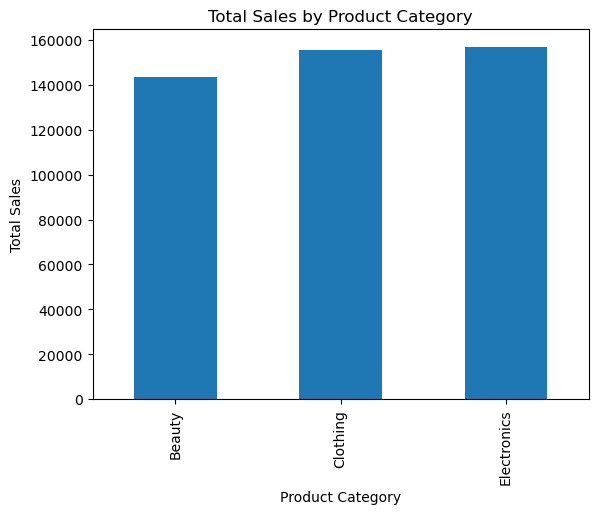

In [128]:
cat_sales = data.groupby("Product Category")["Total Amount"].sum()

cat_sales.plot(kind="bar", title="Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()


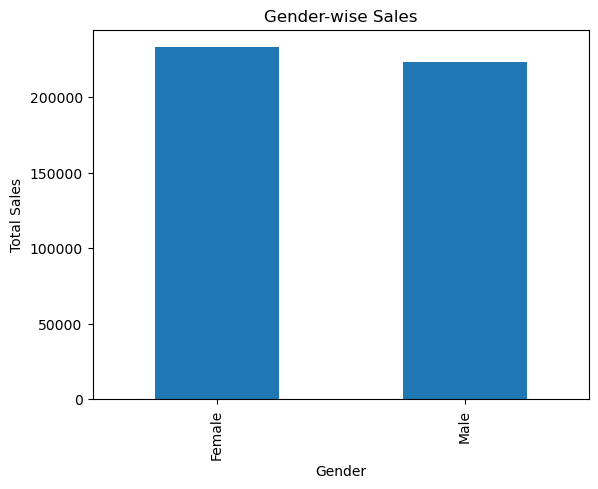

In [133]:
gender_sales = data.groupby("Gender")["Total Amount"].sum()

gender_sales.plot(kind="bar", title="Gender-wise Sales")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()


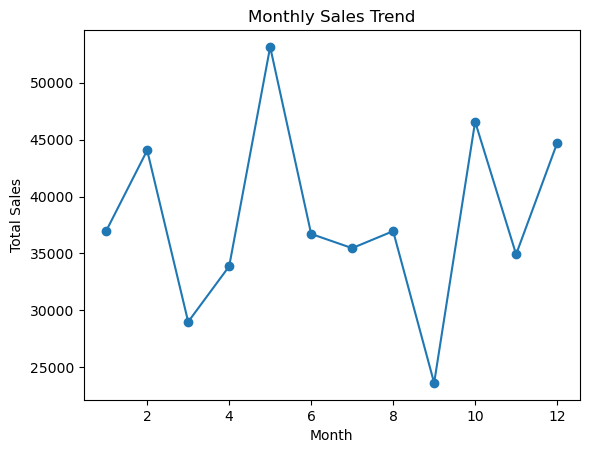

In [137]:
monthly_sales = data.groupby("Month")["Total Amount"].sum()
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


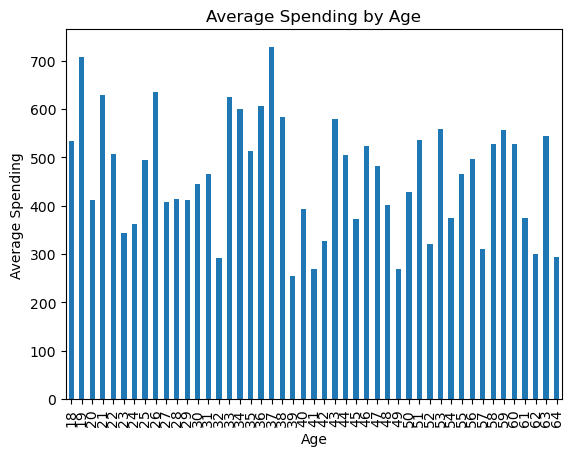

In [139]:
age_spending = data.groupby("Age")["Total Amount"].mean()
age_spending.plot(kind="bar", title="Average Spending by Age")
plt.xlabel("Age")
plt.ylabel("Average Spending")
plt.show()


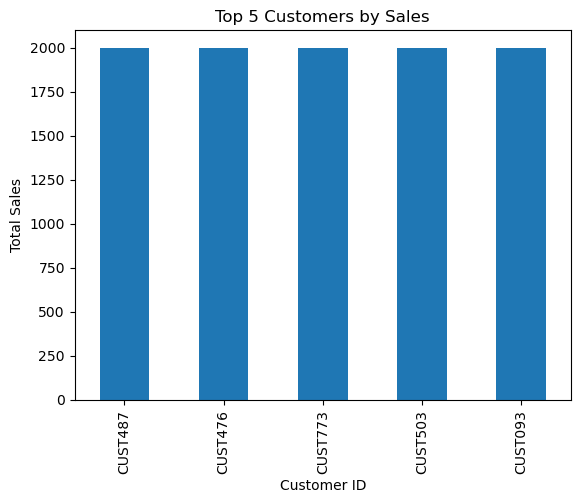

In [143]:
top_customers = data.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind="bar", title="Top 5 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.show()


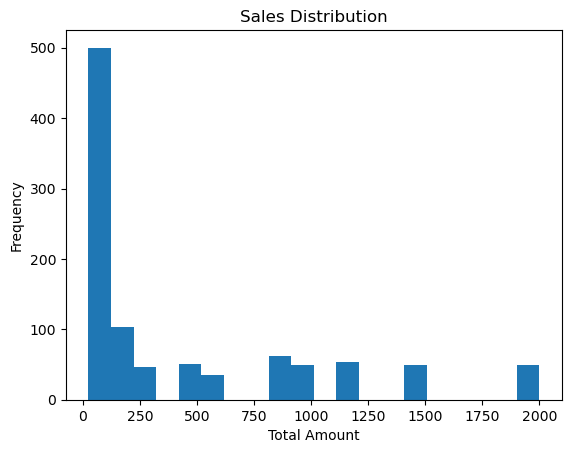

In [145]:
data["Total Amount"].plot(kind="hist", bins=20, title="Sales Distribution")
plt.xlabel("Total Amount")
plt.show()


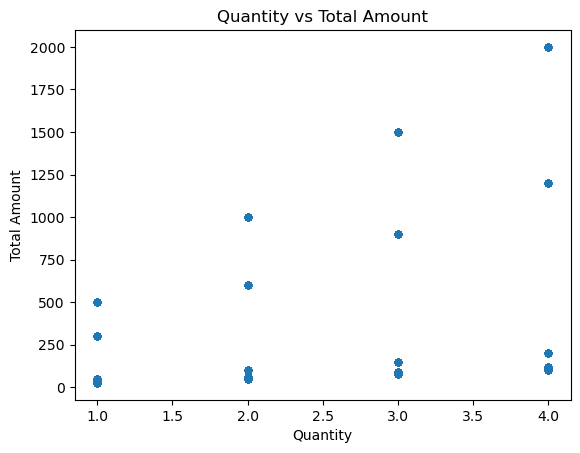

In [149]:
data.plot(kind="scatter", x="Quantity", y="Total Amount", title="Quantity vs Total Amount")
plt.show()


# Insights from analysis

 Electronics category generates the highest total sales, indicating strong demand and consistent purchasing.

Despite having the highest total sales, Electronics does not have the highest average order value.

A small number of customers (e.g., top 10) contribute a large portion of total revenue.

Sales contribution varies by gender across product categories.

Certain age groups show higher spending behavior compared to others.

Monthly sales trends show noticeable fluctuations over time.

Some categories sell in high quantities but generate lower revenue, while others sell fewer units but generate higher revenue.

# Recommendations for upcoming years

Continue prioritizing Electronics by ensuring adequate inventory and frequent availability

Introduce product bundles, discounts on bulk purchases, and premium variants.

Introduce product bundles, discounts on bulk purchases, and premium variants.

Launch loyalty programs, personalized offers, and exclusive deals for top customers.

Review pricing, promotions, and product placement for categories with low revenue despite decent sales volume.

Plan inventory and marketing campaigns based on monthly sales trends.

Use moving average and trend-based forecasts to guide stock replenishment.

Gradually diversify into new or complementary product categories.